In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix,parallel_coordinates
import seaborn as sns
import plotly.express as px
from folium.plugins import HeatMap
import folium
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import scale,LabelEncoder,StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,silhouette_samples, silhouette_score
import xgboost
import tensorflow as tf
from tensorflow import keras
import shap

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from yellowbrick.cluster.elbow import kelbow_visualizer


from scipy import stats

from statsmodels.tsa.ar_model import AutoReg, ARResults
from statsmodels.tsa import stattools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

from datetime import datetime
from meteostat import Point, Monthly

# EDA (Exploratory Data Analysis)

In [140]:
df=pd.read_csv('df_clean.csv')

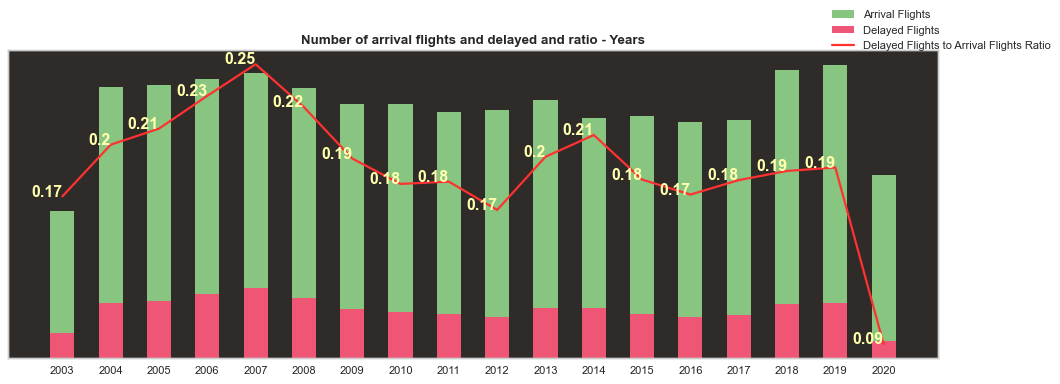

In [50]:
df_del_arr=df.groupby('year').agg(sum).loc[:,['arr_flights','arr_del15']]
df_del_arr['del_arr_ratio']=df_del_arr['arr_del15']/df_del_arr['arr_flights']
years=np.sort(df.year.unique())
width=0.5

fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)

ax1.bar(years,df_del_arr.arr_flights,width=width,label='Arrival Flights',color="#88c580")
ax1.bar(years,df_del_arr.arr_del15,width=width,label='Delayed Flights',color='#ef5675')

ax2=ax1.twinx()

ax2.plot(df_del_arr.del_arr_ratio, c='#FF3131', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(years)):
    ax2.text(years[i],df_del_arr.del_arr_ratio.iloc[i],round(df_del_arr.del_arr_ratio.iloc[i],2),ha='right',c='#ffffad',size='large',weight='bold')

ax1.set_facecolor( "#2e2b28")
ax1.grid()
ax2.grid()
ax1.set_yticks([])
ax2.set_yticks([])

ax1.set_xticks(years)
ax1.set_title('Number of arrival flights and delayed and ratio - Years',weight='bold')

fig.legend()
plt.show();

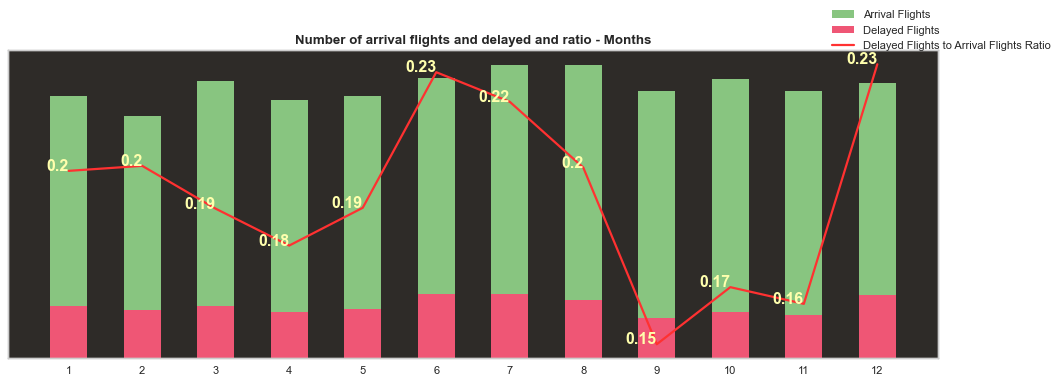

In [51]:
df_del_arr=df.groupby('month').agg(sum).loc[:,['arr_flights','arr_del15']]
df_del_arr['del_arr_ratio']=df_del_arr['arr_del15']/df_del_arr['arr_flights']
months=np.sort(df.month.unique())
width=0.5

fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(months,df_del_arr.arr_flights,width=width,label='Arrival Flights',color="#88c580")
ax1.bar(months,df_del_arr.arr_del15,width=width,label='Delayed Flights',color='#ef5675')


ax2=ax1.twinx()

ax2.plot(df_del_arr.del_arr_ratio,  c='#FF3131', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(months)):
    ax2.text(months[i],df_del_arr.del_arr_ratio.iloc[i],round(df_del_arr.del_arr_ratio.iloc[i],2),ha='right',c='#ffffad',size='large',weight='bold')

ax1.set_facecolor( "#2e2b28")
ax1.grid()
ax2.grid()
ax1.set_yticks([])
ax2.set_yticks([])

ax1.set_xticks(months)
ax1.set_title('Number of arrival flights and delayed and ratio - Months',weight='bold')


fig.legend()

plt.show();


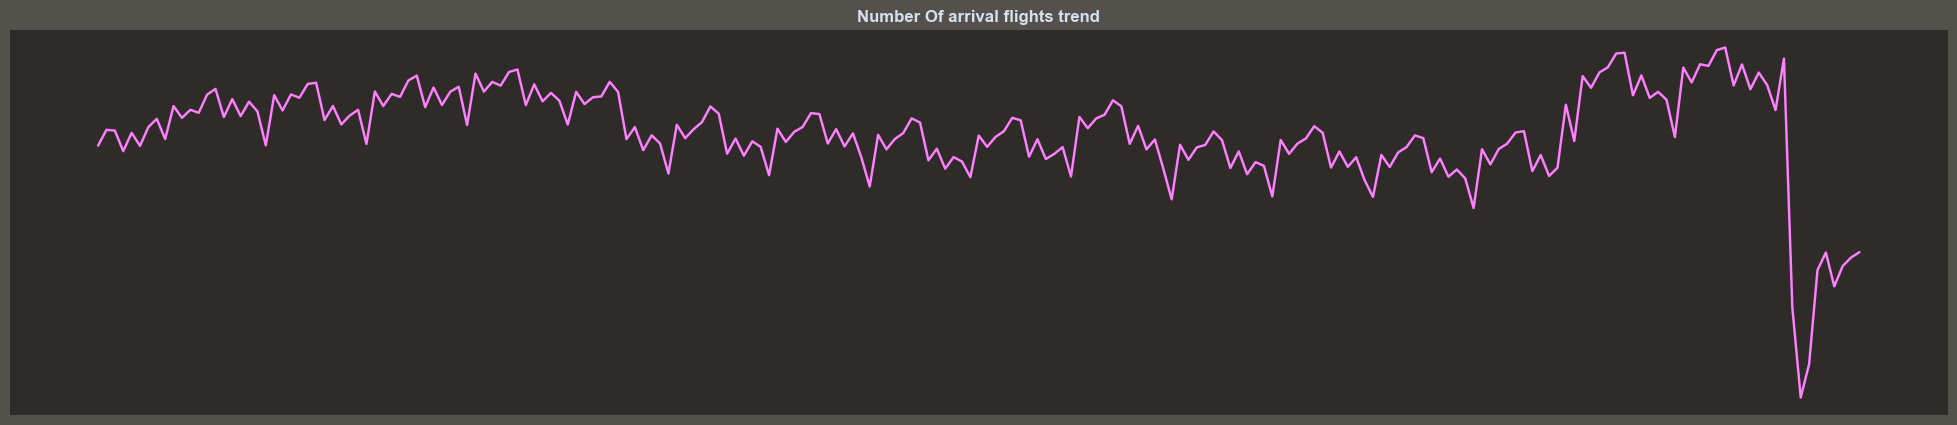

In [52]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig,ax=plt.subplots(figsize=(25, 5),facecolor="#54504c")
ax.plot(df.groupby('year_month').arr_flights.agg(sum),color="#ff80ff")
ax.set_facecolor("#2e2b28")
ax.set_title('Number Of arrival flights trend' ,color="#d7e1ee", weight='bold')
ax.grid()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines[:].set_visible(False)
plt.show();

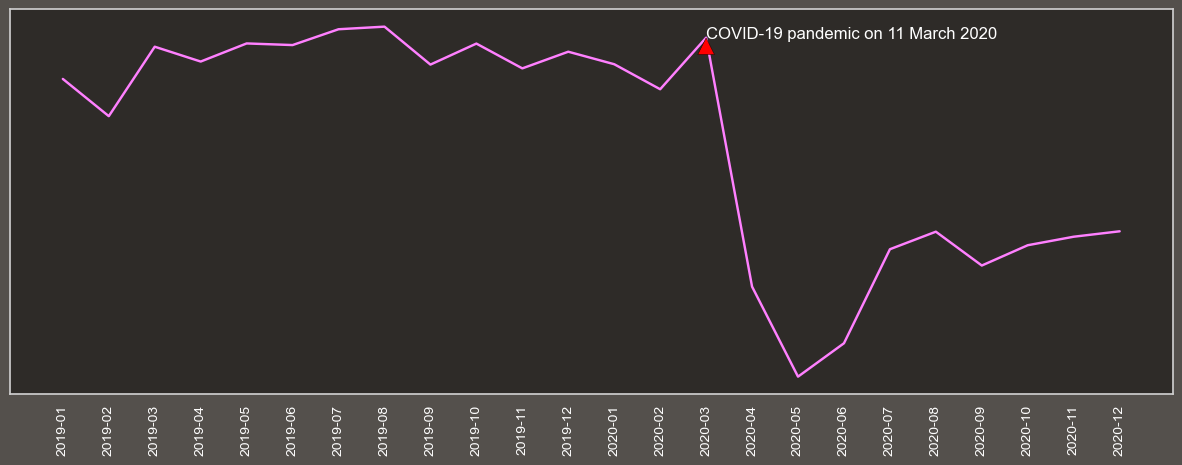

In [63]:
fig,ax=plt.subplots(figsize=(15, 5),facecolor="#54504c")
arr_trend_1920=df[np.logical_or(df['year']==2019,df['year']==2020)].groupby('year_month').arr_flights.agg(sum)
ax.plot(arr_trend_1920,color="#ff80ff")
ax.set_xticks(arr_trend_1920.index,rotation=90,color='y')
plt.annotate('COVID-19 pandemic on 11 March 2020', xy=(14,411181), xytext=(14,411181),color='white',
            arrowprops=dict(facecolor='red', shrink=0.05))
ax.set_facecolor("#2e2b28")
ax.set_yticks([])
ax.set_xticks(arr_trend_1920.index)
ax.grid()
ax.set_xticklabels(arr_trend_1920.index,rotation=90,color='white')
plt.show();

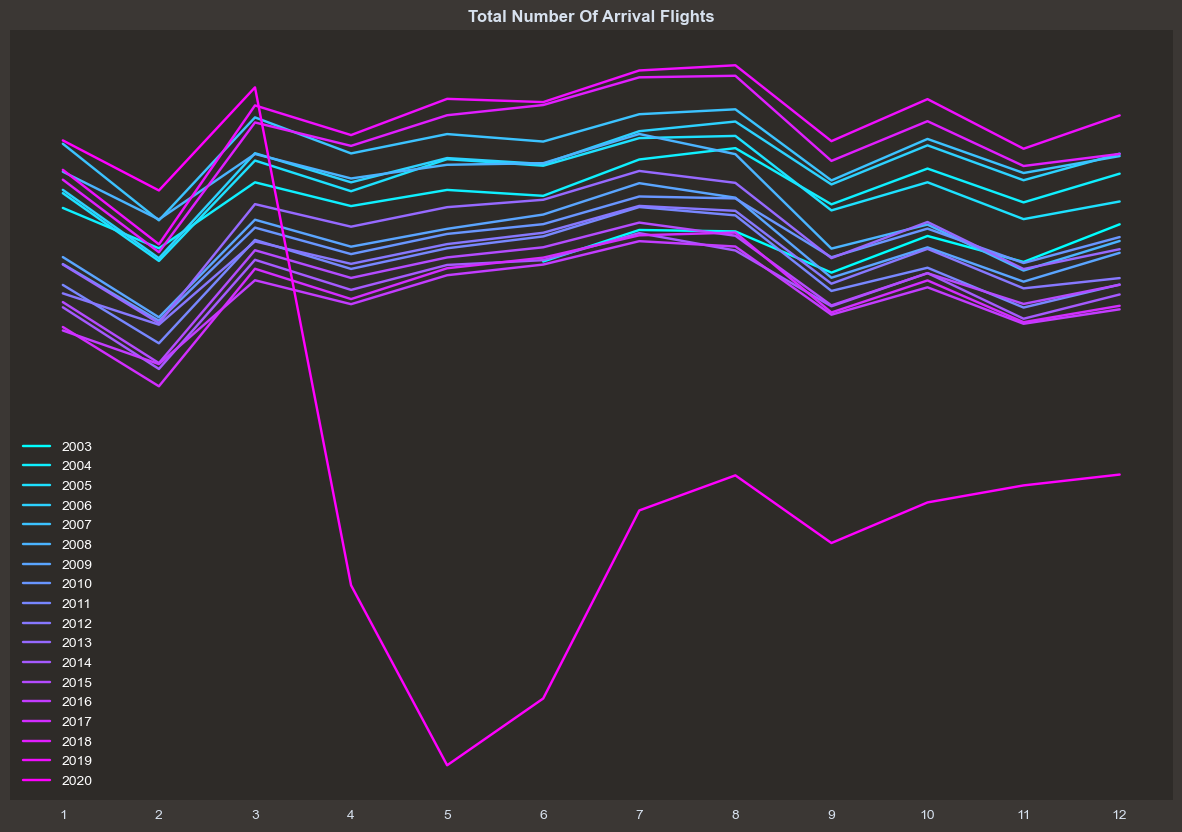

In [143]:
fig,ax=plt.subplots(figsize=(15, 10),facecolor="#3b3734")
years=np.sort(df.year.unique())
colors = plt.cm.cool(np.linspace(0,1,len(years)))

for i in range(len(years)):
    yma=df[df['year']==years[i]].groupby('month').arr_flights.agg(sum)
    ax.plot(yma,label=years[i],c=colors[i])
ax.set_facecolor("#2e2b28")
ax.set_title('Total Number Of Arrival Flights' ,color="#d7e1ee", weight='bold')
ax.grid()
ax.set_yticklabels([])
ax.legend(labelcolor='white')
ax.set_xticks(range(1,13))
ax.set_xticklabels(range(1,13),color="#d7e1ee")
ax.spines[:].set_visible(False)
plt.show();

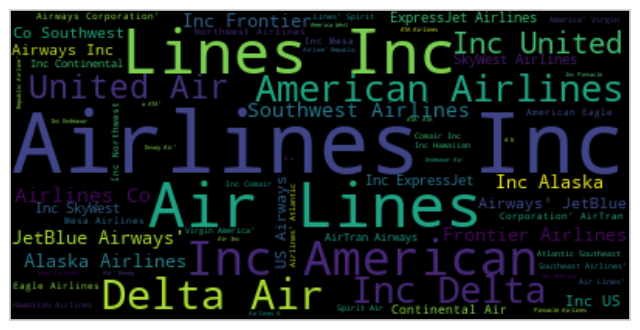

In [187]:
carrier_list=["".join(x) for x in df.carrier_name.unique()]
carrier_str=str(["".join(x) for x in df.carrier_name])
from wordcloud import WordCloud
wc = WordCloud(stopwords=carrier_list,max_font_size=150)
wc.generate(carrier_str)
plt.grid()
plt.xticks([])
plt.yticks([])
plt.imshow(wc, interpolation="bilinear");

<Figure size 800x550 with 0 Axes>

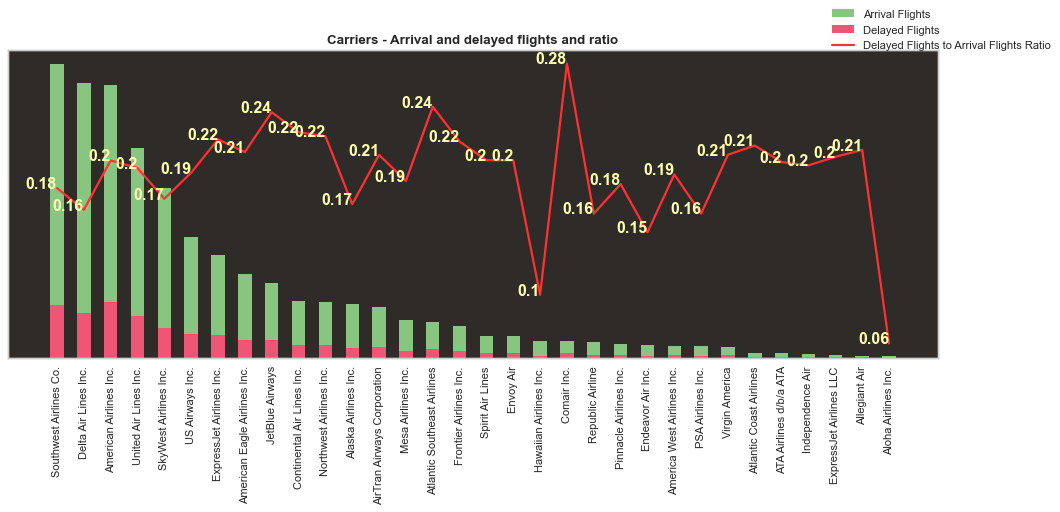

In [202]:
df_del_arr_car=df.groupby('carrier_name').agg(sum).loc[:,['arr_flights','arr_del15']].sort_values('arr_flights',ascending=False)
df_del_arr_car['del_arr_ratio']=df_del_arr_car['arr_del15']/df_del_arr_car['arr_flights']

carriers=df_del_arr_car.index
width=0.5


plt.figure()
fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(carriers,df_del_arr_car.arr_flights,width=width,label='Arrival Flights',color="#88c580")
ax1.bar(carriers,df_del_arr_car.arr_del15,width=width,label='Delayed Flights',color='#ef5675')


ax2=ax1.twinx()

ax2.plot(df_del_arr_car.del_arr_ratio, c='#FF3131', label="Delayed Flights to Arrival Flights Ratio",linewidth=2)

for i in range(len(carriers)):
    ax2.text(carriers[i],df_del_arr_car.del_arr_ratio.iloc[i],round(df_del_arr_car.del_arr_ratio.iloc[i],2),ha='right',c='#ffffad',size='large',weight='bold')    

ax1.set_xticks(carriers)
ax1.set_xticklabels(carriers, rotation = 90)
ax1.set_facecolor( "#2e2b28")
ax1.grid()
ax2.grid()
ax1.set_yticks([])
ax2.set_yticks([])

ax1.set_title('Carriers - Arrival and delayed flights and ratio',weight='bold')


fig.legend()

plt.show();

<Figure size 800x550 with 0 Axes>

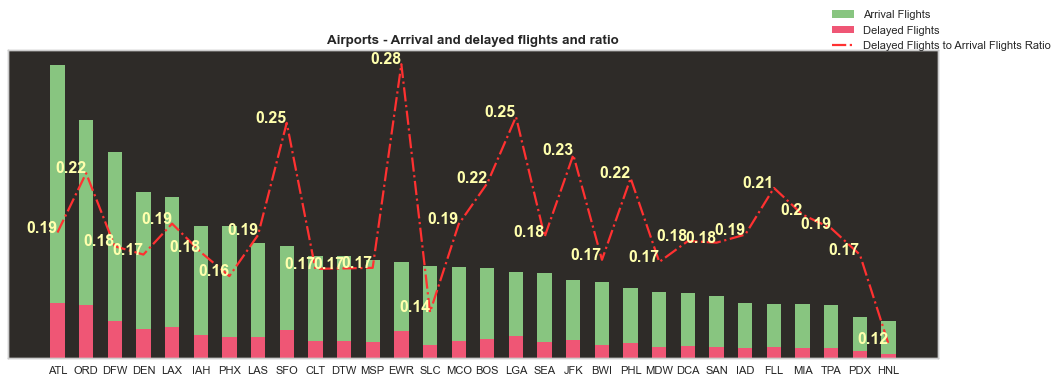

In [196]:
df_del_arr_air=df.groupby('airport').agg(sum).loc[:,['arr_flights','arr_del15']].sort_values('arr_flights',ascending=False)
df_del_arr_air['del_arr_ratio']=df_del_arr_air['arr_del15']/df_del_arr_air['arr_flights']

airports=df_del_arr_air.index
width=0.5


plt.figure()
fig,ax1=plt.subplots(figsize=(15, 5), dpi=80)


ax1.bar(airports,df_del_arr_air.arr_flights,width=width,label='Arrival Flights',color="#88c580")
ax1.bar(airports,df_del_arr_air.arr_del15,width=width,label='Delayed Flights',color='#ef5675')

ax2=ax1.twinx()

ax2.plot(df_del_arr_air.del_arr_ratio, c='#FF3131', label="Delayed Flights to Arrival Flights Ratio",linewidth=2,linestyle='dashdot')

for i in range(len(airports)):
    ax2.text(airports[i],df_del_arr_air.del_arr_ratio.iloc[i],round(df_del_arr_air.del_arr_ratio.iloc[i],2),ha='right',c='#ffffad',size='large',weight='bold')    

ax1.set_facecolor( "#2e2b28")
ax1.grid()
ax2.grid()
ax1.set_yticks([])
ax2.set_yticks([])

ax1.set_title('Airports - Arrival and delayed flights and ratio',weight='bold')


fig.legend()
plt.show();

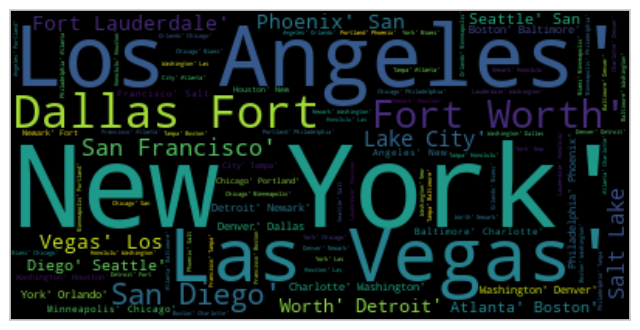

In [188]:
city_list=["".join(x) for x in df.city.unique()]
city_str=str(["".join(x) for x in df.city])
from wordcloud import WordCloud
wc = WordCloud(stopwords=city_list,max_font_size=150)
wc.generate(city_str)
plt.grid()
plt.xticks([])
plt.yticks([])
plt.imshow(wc, interpolation="bilinear");

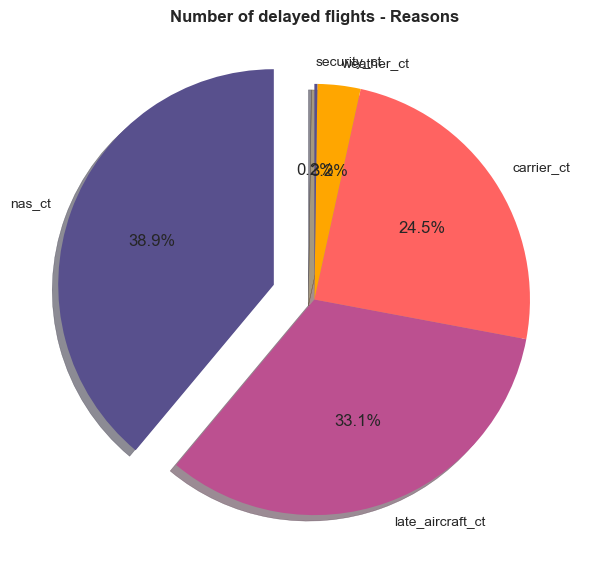

In [225]:
del_n_total=np.sum(df[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']])
del_n_total=del_n_total.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(del_n_total.shape[0])
explode[0]=0.2
plt.pie(del_n_total,labels=del_n_total.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode,
        colors=['#58508d','#bc5090','#ff6361','#ffa600'])

plt.title('Number of delayed flights - Reasons',weight='bold')
plt.show();

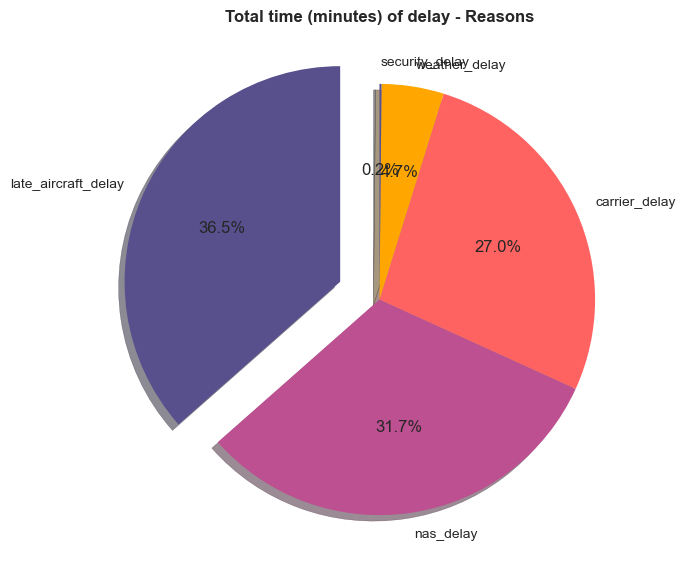

In [226]:
del_min_total=np.sum(df[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']])
del_min_total=del_min_total.sort_values(ascending=False)
plt.figure(figsize=(7,7))
explode=np.zeros(del_min_total.shape[0])
explode[0]=0.2
plt.pie(del_min_total,labels=del_min_total.index,autopct='%1.1f%%',shadow=True,startangle=90,explode=explode
       ,colors=['#58508d','#bc5090','#ff6361','#ffa600'])
plt.title('Total time (minutes) of delay - Reasons',weight='bold')
plt.show();

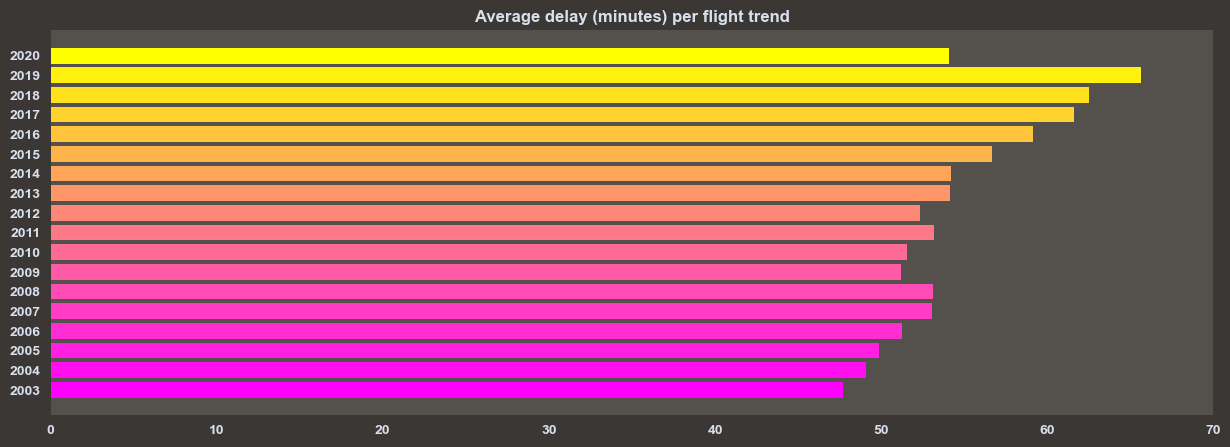

In [186]:
df_avg_del=df.groupby('year').agg('mean').del_avg_dur
years=np.sort(df.year.unique())

colors = plt.cm.spring(np.linspace(0,1,len(years)))

fig,ax=plt.subplots(figsize=(15,5),facecolor="#3b3734")

ax.barh(df_avg_del.index,df_avg_del,color=colors)

ax.set_facecolor("#54504c")

ax.set_title('Average delay (minutes) per flight trend' ,color="#d7e1ee", weight='bold')

ax.grid()

ax.set_xticks(ticks=[0,10,20,30,40,50,60,70]) 
ax.set_xticklabels(labels=[0,10,20,30,40,50,60,70],color="#d7e1ee",weight='bold')

ax.set_yticks(years)
ax.set_yticklabels(labels=years,color="#d7e1ee",weight='bold')

ax.spines[:].set_visible(False)

plt.show();

In [203]:
df_city=df.groupby('city_state').agg(sum).loc[:,['arr_flights','arr_del15']]


usa_latlong=pd.read_csv('uscities.csv')
usa_latlong['city_state']=usa_latlong['city']+", "+usa_latlong['state_id']

df_city_lat=pd.DataFrame(np.zeros(27),index=df_city.index,columns=['lat'])
df_city_long=pd.DataFrame(np.zeros(27),index=df_city.index,columns=['long'])

for city in df.city_state.unique():
    df_city_lat.loc[city,'lat']=usa_latlong[usa_latlong['city_state']==city].loc[:,'lat'].iloc[0]
    df_city_long.loc[city,'long']=usa_latlong[usa_latlong['city_state']==city].loc[:,'lng'].iloc[0]

df_city=pd.concat([df_city,df_city_lat,df_city_long],axis=1)


In [204]:
#Cities - Arrival and delayed flights
usa_map =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 

for i in range(df_city.shape[0]):
 folium.CircleMarker([df_city.iloc[i,2],df_city.iloc[i,3]],radius=df_city.iloc[i,0]*30/max(df_city.iloc[:,0]),color='yellow',fill_color='green',fill_opacity=0.3).add_to(usa_map) 

for i in range(df_city.shape[0]):
 folium.CircleMarker([df_city.iloc[i,2],df_city.iloc[i,3]],radius=df_city.iloc[i,1]*30/max(df_city.iloc[:,0]),color='red',fill_color='red',fill_opacity=1).add_to(usa_map) 

usa_map.save('usa_map.html')
usa_map

In [221]:
#cities based on arrival flights
usa_heatmap =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 
heatmap_data=np.array(df_city.loc[:,['lat','long','arr_flights']])
HeatMap(data=heatmap_data,).add_to(usa_heatmap)

usa_heatmap.save('usa_heatmap.html')
usa_heatmap

In [222]:
#cities based on delayed flights
usa_heatmap_del =  folium.Map(location=[39.7620, -104.8758], zoom_start=4) 
usa_heatmap_del.save('usa_heatmap.html')

heatmap_data_del=np.array(df_city.loc[:,['lat','long','arr_del15']])
HeatMap(data=heatmap_data_del).add_to(usa_heatmap_del)
usa_heatmap_del